### SPI estimation code to assess drought in Jordan

SPI stands for Standardized Precipitation Index which assesses how much a precipitation value deviates from a normal condition.

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import statistics
from fitter import get_distributions
from scipy import stats
from scipy.stats import norm
from scipy.stats import gamma

### SPI estimation function

In [6]:
def  SPI_value(distribution,Date_list,P_list):
    
    mon = P_list
    Dates=Date_list
    dd=distribution
    SPI_values = []
    
    for i in range(0,12):
        
        data = mon[i]
        #dd = "genextreme"       
        dist = getattr(stats, dd)
        param = dist.fit(data) 
        
        strings = dd+".cdf(data,"+str(param)[1:-2]+")"
        F = eval(strings)
        #F = genextreme.cdf(tt,param[0],param[1],param[2])
        
        SPI_values.append((Dates[i],norm.ppf(F,0,1)))
    
    Dat = []
    spei = []
    for j in range(0,12):
        
        Dat.append(SPI_values[j][0])
        
        spei.append(SPI_values[j][1])  
    
    
    dat1= pd.DataFrame(np.concatenate(Dat))
    
    dat1 = dat1.rename({0: 'Date'}, axis=1)
    
    spei1 =pd.DataFrame(np.concatenate(spei))
    
    spei1 = spei1.rename({0: 'SPI'}, axis=1)
    
    all_together = pd.concat([dat1,spei1],axis=1)
    
    all_together_sorted = all_together.sort_values("Date")
    
    return all_together_sorted


### First read in the file (precipitation)

In [7]:
Precipitation_raw= pd.read_csv('data/AD0019.csv')

#column names

col_names = Precipitation_raw.columns

#check length of the data

length = len(Precipitation_raw.loc[:,col_names[1]])

# Missing values removed

Precipitation_raw.dropna(subset=[col_names[1]],inplace=True)

Precipitation = Precipitation_raw.reset_index(drop=True)

# length after the missing values are removed

length2 = len(Precipitation.loc[:,col_names[1]])

### Sum the precipitation in a given month

First you need to change it to change the date (which is in string format at the begining) to date format

In [8]:
for k in range(0,len(Precipitation.loc[:,col_names[0]])):
    
    Precipitation.loc[k,col_names[0]] = datetime.datetime.strptime(Precipitation.loc[k,col_names[0]], '%d/%m/%Y')

# monthly sum
Precipitation1 = pd.DataFrame(Precipitation.resample('M', on=col_names[0]).sum())

Precipitation1 = Precipitation1.reset_index(drop=True)

### Create monthly date from 01/1980 till end of the data

In [9]:
starting_date = Precipitation_raw.loc[0,col_names[0]][3:]

ending_date = Precipitation_raw.loc[len(Precipitation.loc[:,col_names[1]])-1,col_names[0]][3:]

ending_date1 = int(ending_date[0:2])+1

ending_date = '0' + str(ending_date1) + ending_date[2:]

date_list = [i.strftime("%m-%Y") for i in pd.date_range(start=starting_date, end=ending_date, freq='M')]

col_names1 = Precipitation1.columns

### Estimating SPI values for each accumulation period

In [10]:
acc= [3,6,9,12,24]

SPI_per_accumulation = []

for e in acc:
       
        WB_acc = pd.DataFrame(Precipitation1.loc[:,col_names1[0]].rolling(e).sum()) # accumulation 
        dates= pd.DataFrame(date_list)
        dates['P']=WB_acc.loc[:,col_names1[0]]
        dates.dropna(inplace=True)
        WB_acc = pd.DataFrame(dates)
    
        WB_acc=WB_acc.reset_index(drop=True)
        
        WB_acc = WB_acc.rename({0: 'Date'}, axis=1)
        dates= pd.DataFrame(WB_acc.loc[:,'Date'])
        
        # scaling the data so that it can be fitted easily
        sd=statistics.stdev(WB_acc.loc[:,'P'])
        WB_acc = WB_acc.loc[:,'P']/sd
        #WB_acc = WB_acc.loc[:,'WB']/max(WB_acc.loc[:,'WB'])
        
        dates['P']=WB_acc
        WB_acc = pd.DataFrame(dates)
        
        J=[]
        F=[]
        M=[]
        A=[]
        Ma=[]
        Ju=[]
        Jul=[]
        Au=[]
        S=[]
        O=[]
        N=[]
        D=[]
        
        Dates =[[],[],[],[],[],[],[],[],[],[],[],[]]
        
        for s in range(0,len(WB_acc.loc[:,'P'])):
            if WB_acc.loc[s,'Date'][:2]=="01":
                J.append(WB_acc.loc[s,'P'])
                Dates[0].append(WB_acc.loc[s,'Date'])
            elif  WB_acc.loc[s,'Date'][:2]=="02":
                F.append(WB_acc.loc[s,'P'])
                Dates[1].append(WB_acc.loc[s,'Date'])
            elif  WB_acc.loc[s,'Date'][:2]=="03":
                M.append(WB_acc.loc[s,'P'])
                Dates[2].append(WB_acc.loc[s,'Date'])
            elif  WB_acc.loc[s,'Date'][:2]=="04":
                A.append(WB_acc.loc[s,'P'])
                Dates[3].append(WB_acc.loc[s,'Date'])
            elif  WB_acc.loc[s,'Date'][:2]=="05":
                Ma.append(WB_acc.loc[s,'P'])
                Dates[4].append(WB_acc.loc[s,'Date'])
            elif  WB_acc.loc[s,'Date'][:2]=="06":
                Ju.append(WB_acc.loc[s,'P'])
                Dates[5].append(WB_acc.loc[s,'Date'])
            elif  WB_acc.loc[s,'Date'][:2]=="07":
                Jul.append(WB_acc.loc[s,'P'])
                Dates[6].append(WB_acc.loc[s,'Date'])
            elif  WB_acc.loc[s,'Date'][:2]=="08":
                Au.append(WB_acc.loc[s,'P'])
                Dates[7].append(WB_acc.loc[s,'Date'])
            elif  WB_acc.loc[s,'Date'][:2]=="09":
                S.append(WB_acc.loc[s,'P'])
                Dates[8].append(WB_acc.loc[s,'Date'])
            elif  WB_acc.loc[s,'Date'][:2]=="10":
                O.append(WB_acc.loc[s,'P'])
                Dates[9].append(WB_acc.loc[s,'Date'])
            elif  WB_acc.loc[s,'Date'][:2]=="11":
                N.append(WB_acc.loc[s,'P'])
                Dates[10].append(WB_acc.loc[s,'Date'])
            elif  WB_acc.loc[s,'Date'][:2]=="12":
                D.append(WB_acc.loc[s,'P'])
                Dates[11].append(WB_acc.loc[s,'Date'])
            else:
                pass
        
        mon=[J,F,M,A,Ma,Ju,Jul,Au,S,O,N,D]
        
        # using the function, lets calculate the SPI values
        
        SPI_Jordan = SPI_value("gamma", Dates, mon)
        
        # We need to sort them as they are not sorted
        
        for k in range(0,len(SPI_Jordan.loc[:,'Date'])):
    
            SPI_Jordan.loc[k,'Date2'] = datetime.datetime.strptime(SPI_Jordan.loc[k,'Date'], '%m-%Y')

       
        SPI_Jordan2 = SPI_Jordan.sort_values("Date2")
        
        # delete the extra column called Date2
        del SPI_Jordan2["Date2"]
        
        # Restet index
        SPI_Jordan2 = SPI_Jordan2.reset_index(drop=True)
        
        col_name3 = SPI_Jordan2.columns
        
        # if the extreme values pass -3 or 3 , we assign value of -3 and 3, respectively
        
        for s in range(0,len(SPI_Jordan2.loc[:col_name3[1]])-1):
            
            if SPI_Jordan2.loc[s,col_name3[1]]<-3:
                
                SPI_Jordan2.loc[s,col_name3[1]] = -3
                
            elif SPI_Jordan2.loc[s,col_name3[1]] > 3:
                
                SPI_Jordan2.loc[s,col_name3[1]] = 3
                
            else:
                pass
        
        SPI_per_accumulation.append(SPI_Jordan2)

#### Plot for 3-month accumulation

Text(0.5, 1.0, '3-month')

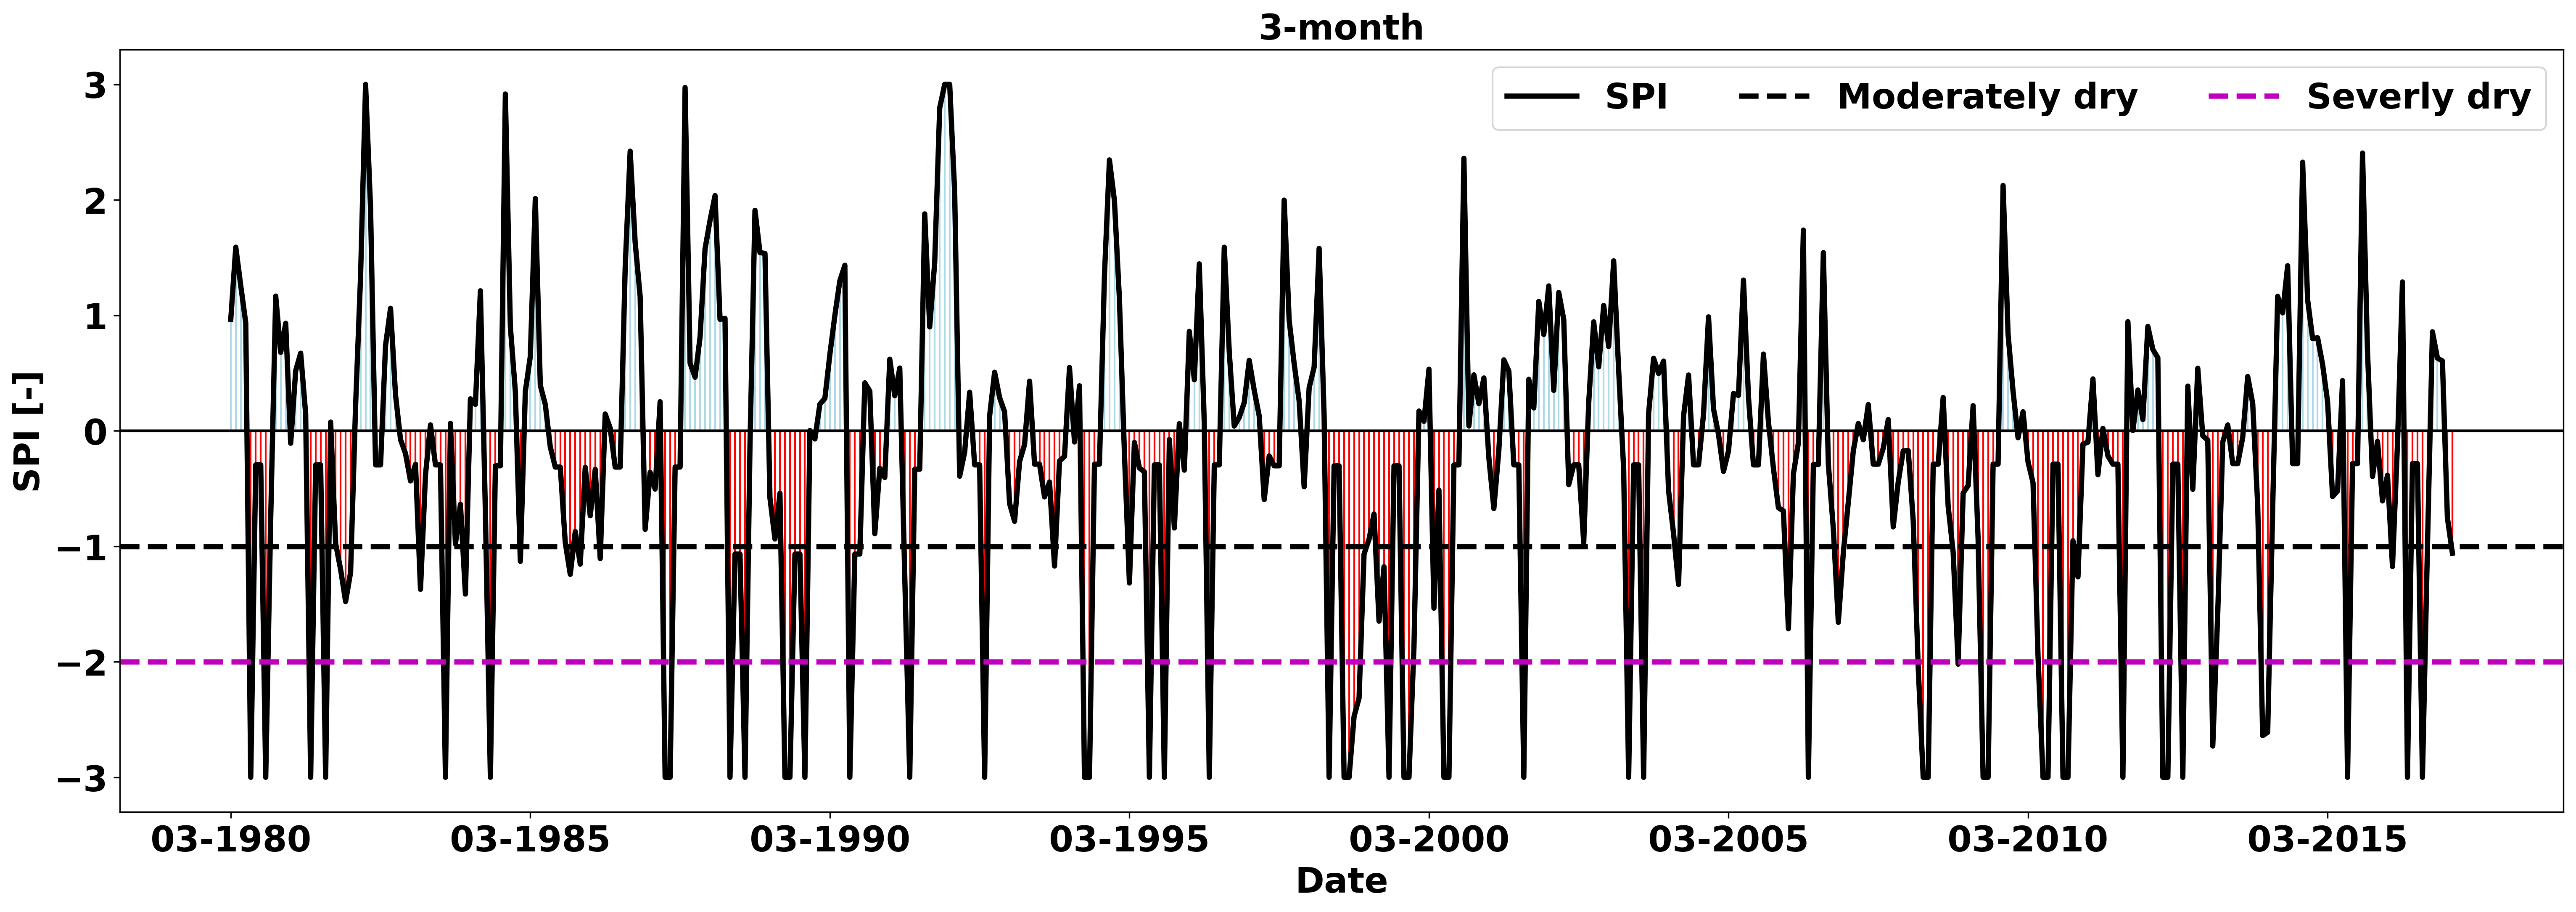

In [12]:
            
%matplotlib inline

SPI_Jordan2 = SPI_per_accumulation[0]

plt.figure(figsize=(25,8),dpi=300)
plt.plot(SPI_Jordan2.loc[:,'Date'],SPI_Jordan2.loc[:,'SPI'],'k',markersize=14,linewidth=3,label='SPI')

plt.rcParams.update({'font.size': 20})
plt.xticks(fontsize=20,fontweight='bold')
plt.yticks(fontsize=20,fontweight='bold')
plt.ylabel('SPI [-]',fontsize=20,fontweight='bold')
plt.xlabel('Date',fontsize=20,fontweight='bold')
plt.axhline(y=0,color='k')
plt.axhline(y=-1,color='k',linestyle='dashed',linewidth=3,label='Moderately dry')
plt.axhline(y=-2,color='m',linestyle='dashed',linewidth=3,label='Severly dry')


for k in range(0,len(SPI_Jordan2.loc[:,'SPI'])):
    if   SPI_Jordan2.loc[k,'SPI']>0:
        c='lightblue'
    else:
        c='red'

    plt.fill_between([SPI_Jordan2.loc[k,'Date'],SPI_Jordan2.loc[k,'Date']],[SPI_Jordan2.loc[k,'SPI'], SPI_Jordan2.loc[k,'SPI']],color=c)


legend_properties = {'weight':'bold','size': 20}
plt.legend(prop=legend_properties,loc='best',ncol=3)

plt.gca().xaxis.set_major_locator(plt.MultipleLocator(60))

plt.title('%s-month'%3,fontsize=20,fontweight='bold')



#### Plot for 6-month accumulation

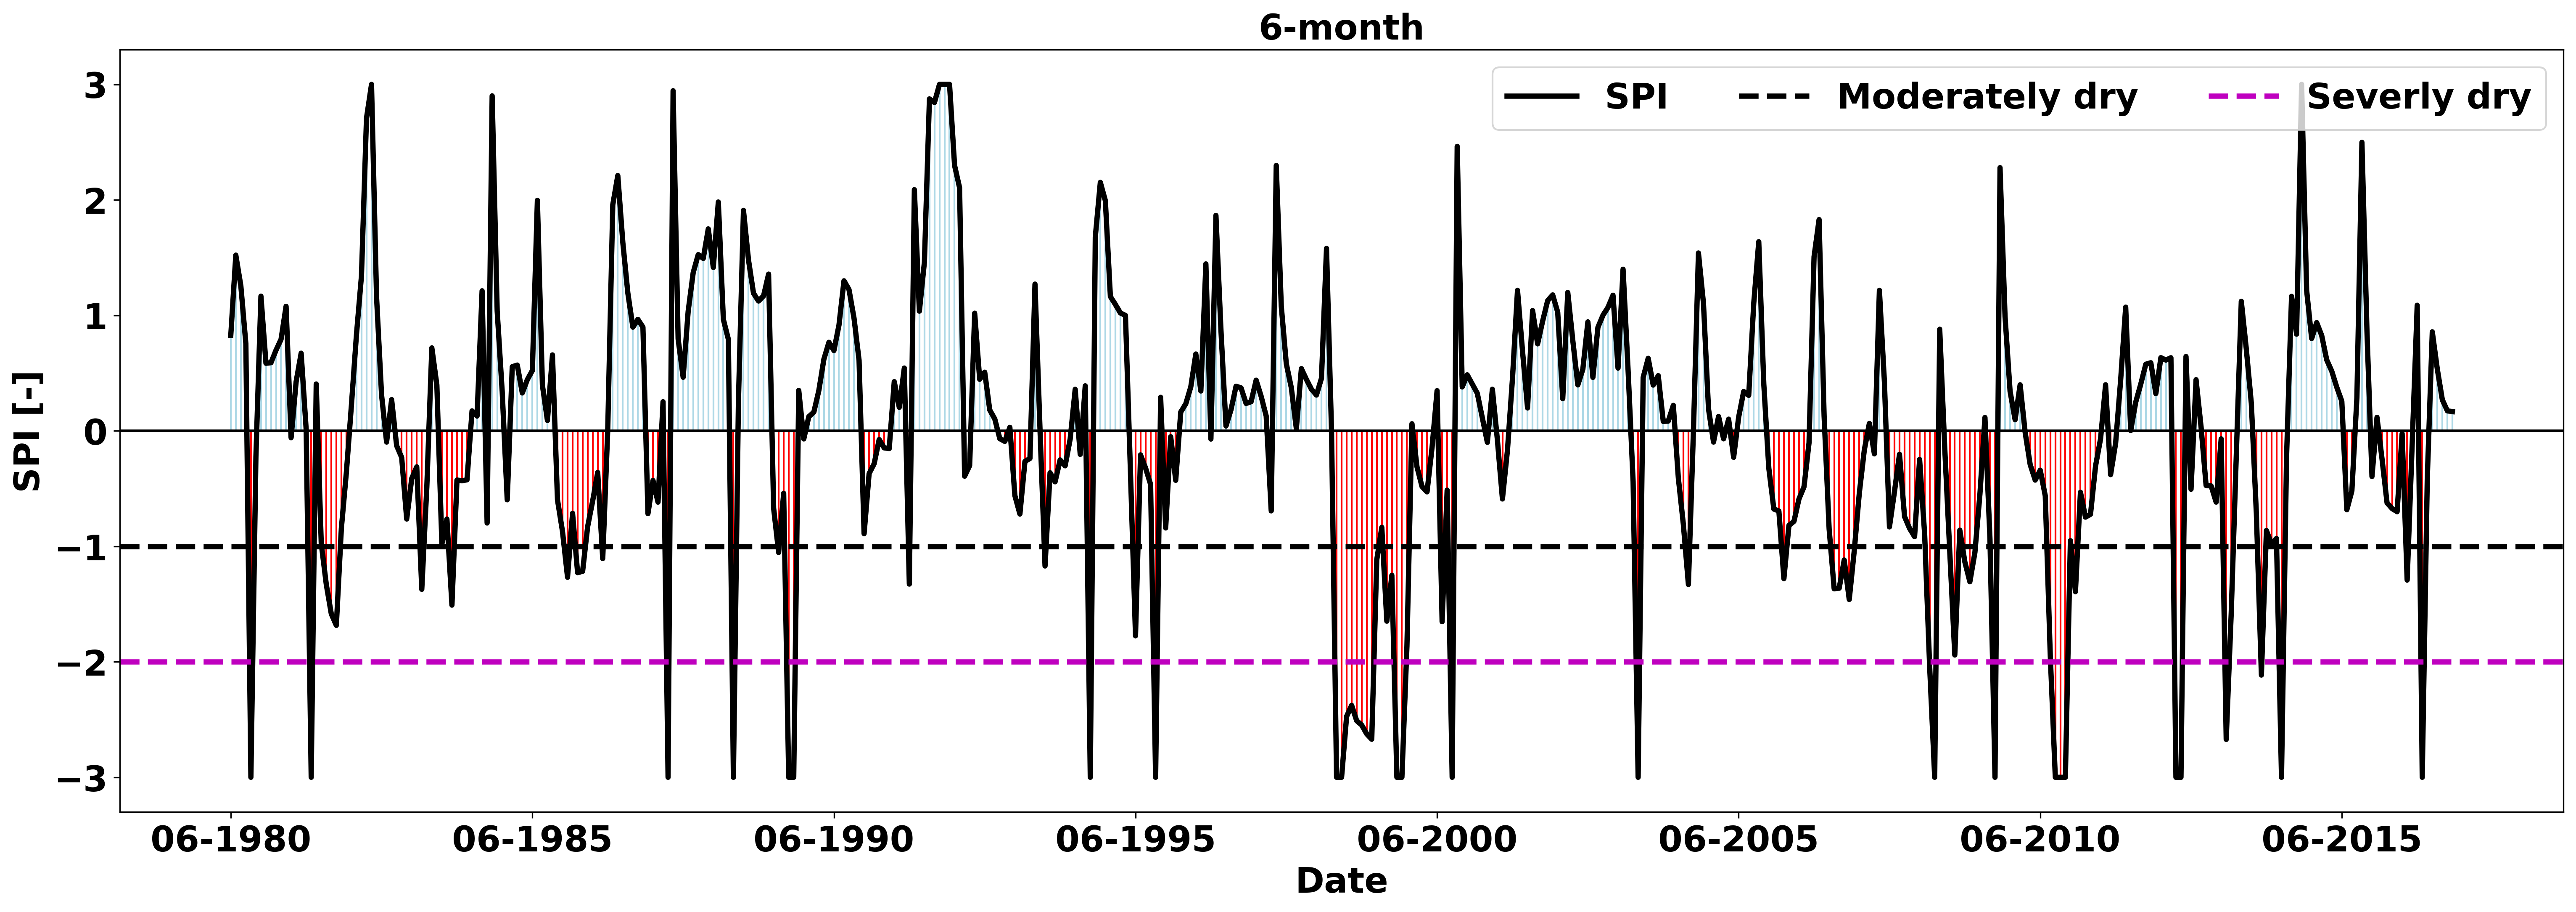

In [ ]:
SPI_Jordan2 = SPI_per_accumulation[1]

plt.figure(figsize=(25,8),dpi=300)
plt.plot(SPI_Jordan2.loc[:,'Date'],SPI_Jordan2.loc[:,'SPI'],'k',markersize=14,linewidth=3,label='SPI')

plt.rcParams.update({'font.size': 20})
plt.xticks(fontsize=20,fontweight='bold')
plt.yticks(fontsize=20,fontweight='bold')
plt.ylabel('SPI [-]',fontsize=20,fontweight='bold')
plt.xlabel('Date',fontsize=20,fontweight='bold')
plt.axhline(y=0,color='k')
plt.axhline(y=-1,color='k',linestyle='dashed',linewidth=3,label='Moderately dry')
plt.axhline(y=-2,color='m',linestyle='dashed',linewidth=3,label='Severly dry')


for k in range(0,len(SPI_Jordan2.loc[:,'SPI'])):
    if   SPI_Jordan2.loc[k,'SPI']>0:
        c='lightblue'
    else:
        c='red'

    plt.fill_between([SPI_Jordan2.loc[k,'Date'],SPI_Jordan2.loc[k,'Date']],[SPI_Jordan2.loc[k,'SPI'], SPI_Jordan2.loc[k,'SPI']],color=c)


legend_properties = {'weight':'bold','size': 20}
plt.legend(prop=legend_properties,loc='best',ncol=3)

plt.gca().xaxis.set_major_locator(plt.MultipleLocator(60))

plt.title('%s-month'%6,fontsize=20,fontweight='bold')


#### Plot for 9-month accumulation

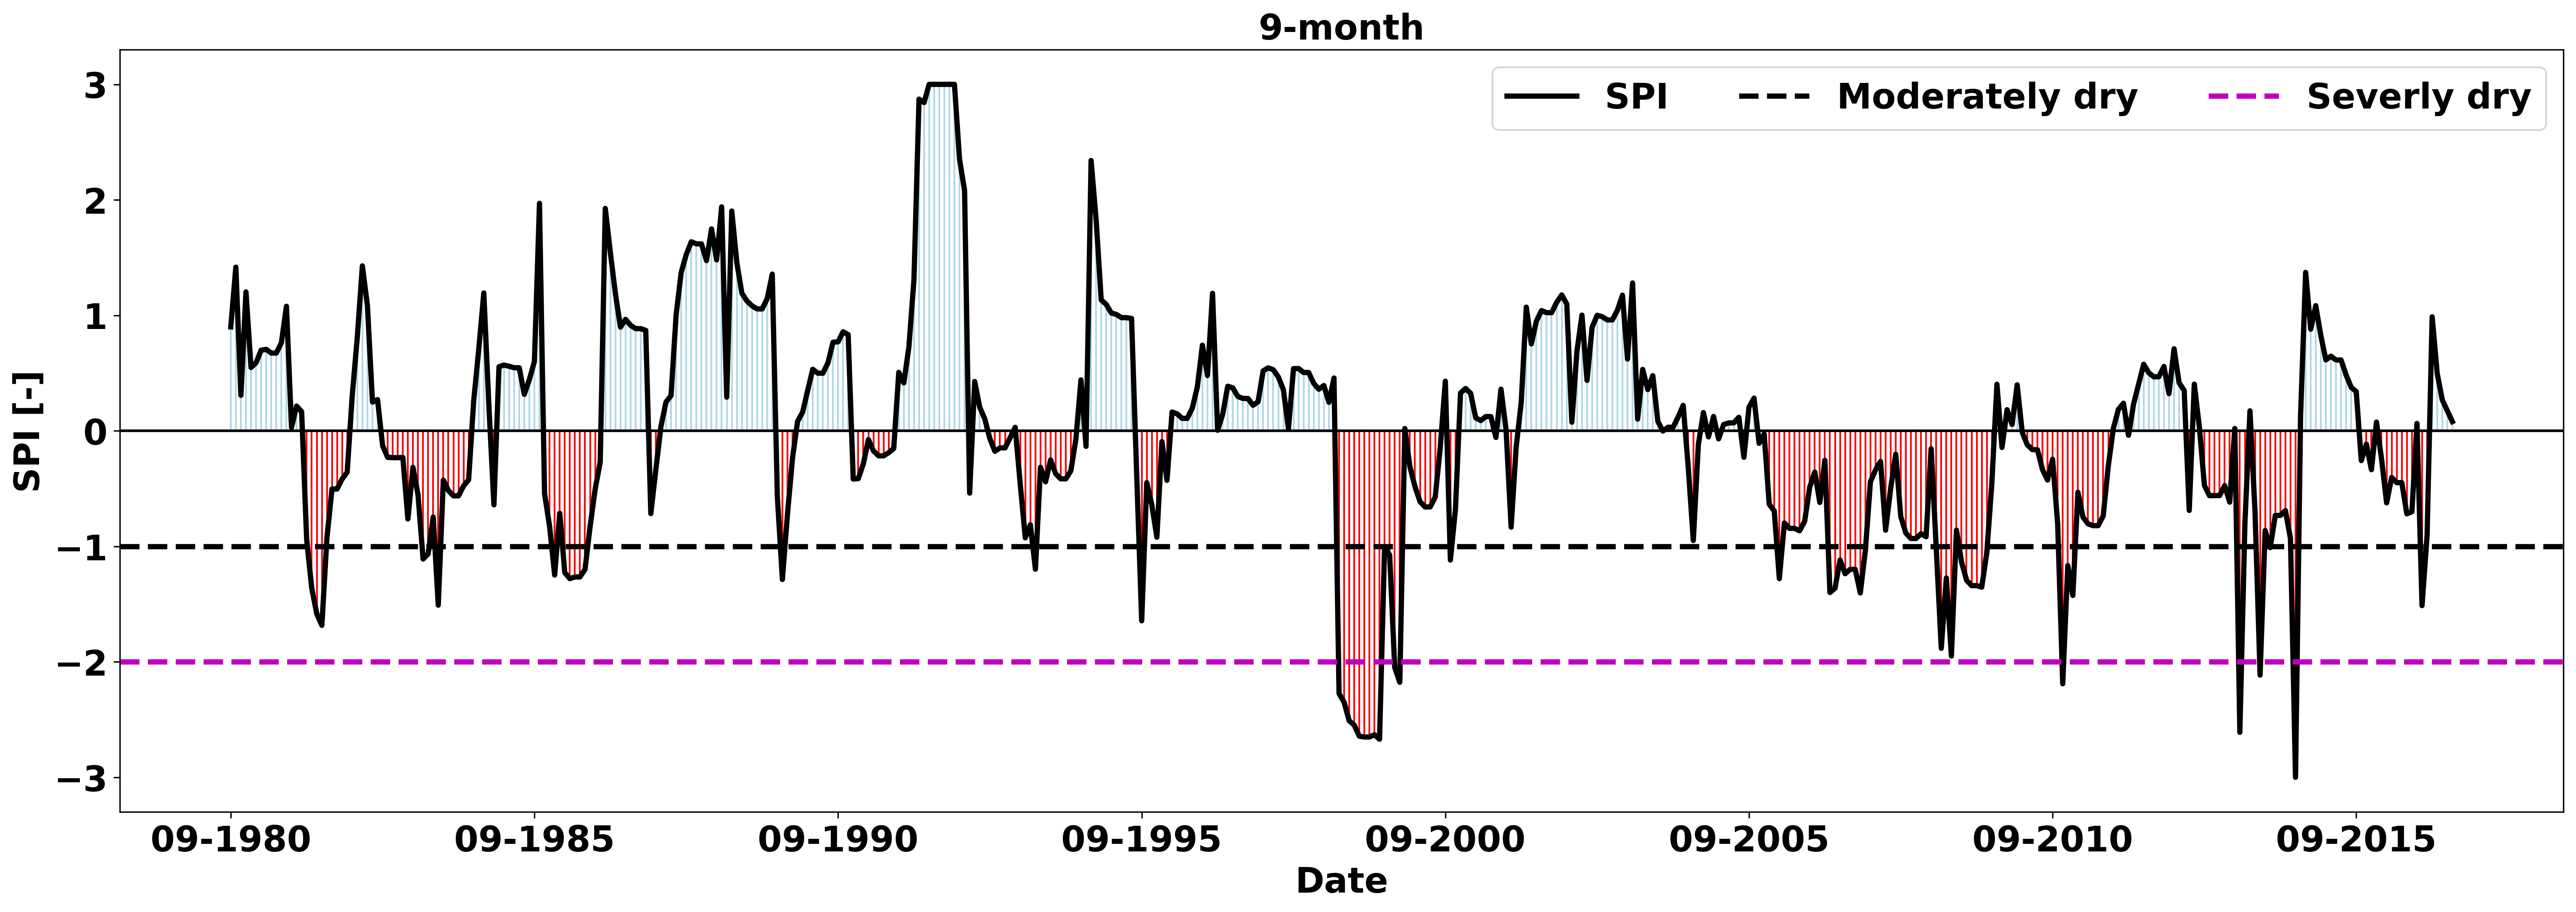

In [ ]:
SPI_Jordan2 = SPI_per_accumulation[2]

plt.figure(figsize=(25,8),dpi=300)
plt.plot(SPI_Jordan2.loc[:,'Date'],SPI_Jordan2.loc[:,'SPI'],'k',markersize=14,linewidth=3,label='SPI')

plt.rcParams.update({'font.size': 20})
plt.xticks(fontsize=20,fontweight='bold')
plt.yticks(fontsize=20,fontweight='bold')
plt.ylabel('SPI [-]',fontsize=20,fontweight='bold')
plt.xlabel('Date',fontsize=20,fontweight='bold')
plt.axhline(y=0,color='k')
plt.axhline(y=-1,color='k',linestyle='dashed',linewidth=3,label='Moderately dry')
plt.axhline(y=-2,color='m',linestyle='dashed',linewidth=3,label='Severly dry')


for k in range(0,len(SPI_Jordan2.loc[:,'SPI'])):
    if   SPI_Jordan2.loc[k,'SPI']>0:
        c='lightblue'
    else:
        c='red'

    plt.fill_between([SPI_Jordan2.loc[k,'Date'],SPI_Jordan2.loc[k,'Date']],[SPI_Jordan2.loc[k,'SPI'], SPI_Jordan2.loc[k,'SPI']],color=c)


legend_properties = {'weight':'bold','size': 20}
plt.legend(prop=legend_properties,loc='best',ncol=3)

plt.gca().xaxis.set_major_locator(plt.MultipleLocator(60))

plt.title('%s-month'%9,fontsize=20,fontweight='bold')


#### Plot for 12-month accumulation

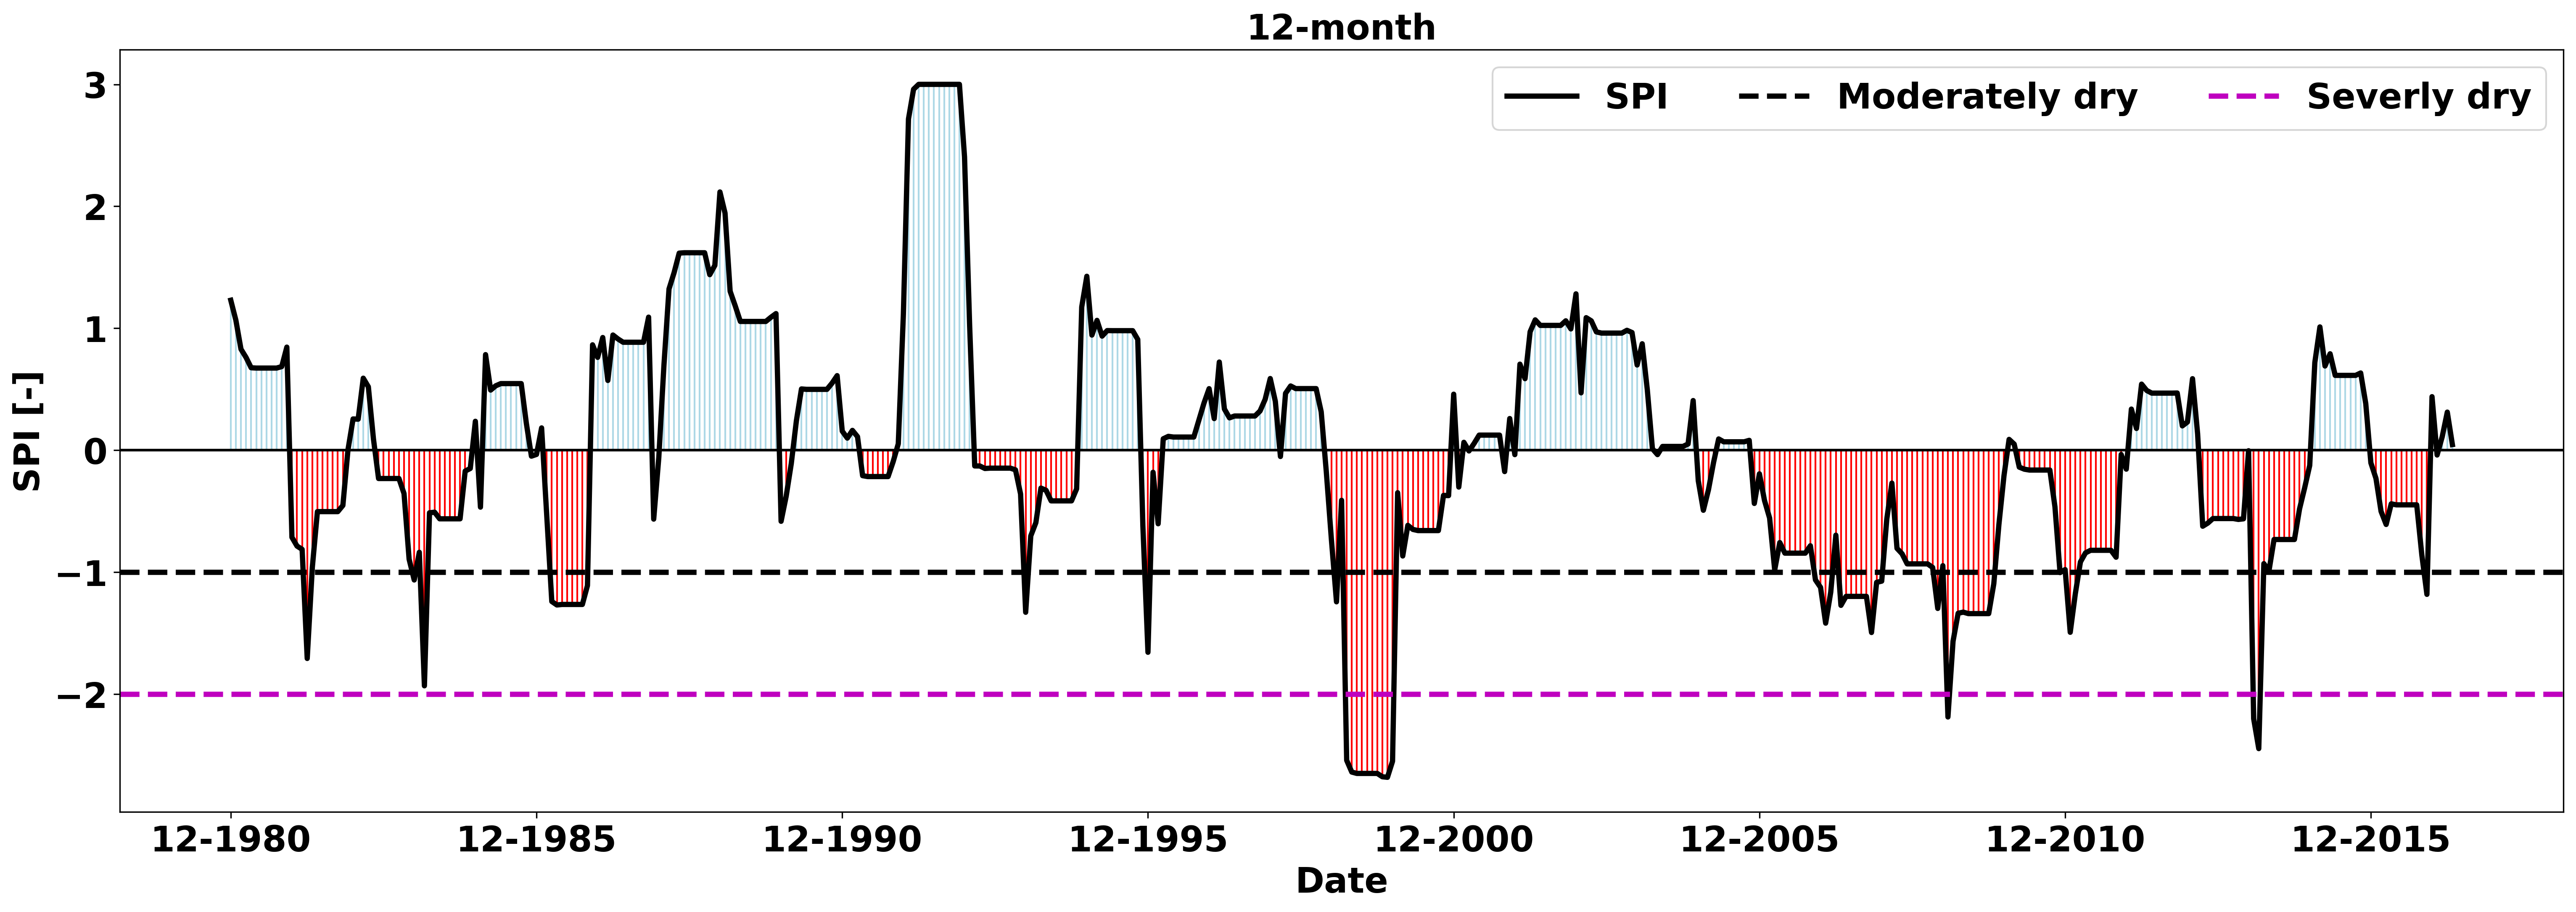

In [ ]:
SPI_Jordan2 = SPI_per_accumulation[3]

plt.figure(figsize=(25,8),dpi=300)
plt.plot(SPI_Jordan2.loc[:,'Date'],SPI_Jordan2.loc[:,'SPI'],'k',markersize=14,linewidth=3,label='SPI')

plt.rcParams.update({'font.size': 20})
plt.xticks(fontsize=20,fontweight='bold')
plt.yticks(fontsize=20,fontweight='bold')
plt.ylabel('SPI [-]',fontsize=20,fontweight='bold')
plt.xlabel('Date',fontsize=20,fontweight='bold')
plt.axhline(y=0,color='k')
plt.axhline(y=-1,color='k',linestyle='dashed',linewidth=3,label='Moderately dry')
plt.axhline(y=-2,color='m',linestyle='dashed',linewidth=3,label='Severly dry')


for k in range(0,len(SPI_Jordan2.loc[:,'SPI'])):
    if   SPI_Jordan2.loc[k,'SPI']>0:
        c='lightblue'
    else:
        c='red'

    plt.fill_between([SPI_Jordan2.loc[k,'Date'],SPI_Jordan2.loc[k,'Date']],[SPI_Jordan2.loc[k,'SPI'], SPI_Jordan2.loc[k,'SPI']],color=c)


legend_properties = {'weight':'bold','size': 20}
plt.legend(prop=legend_properties,loc='best',ncol=3)

plt.gca().xaxis.set_major_locator(plt.MultipleLocator(60))

plt.title('%s-month'%12,fontsize=20,fontweight='bold')


#### Plot for 24-month accumulation

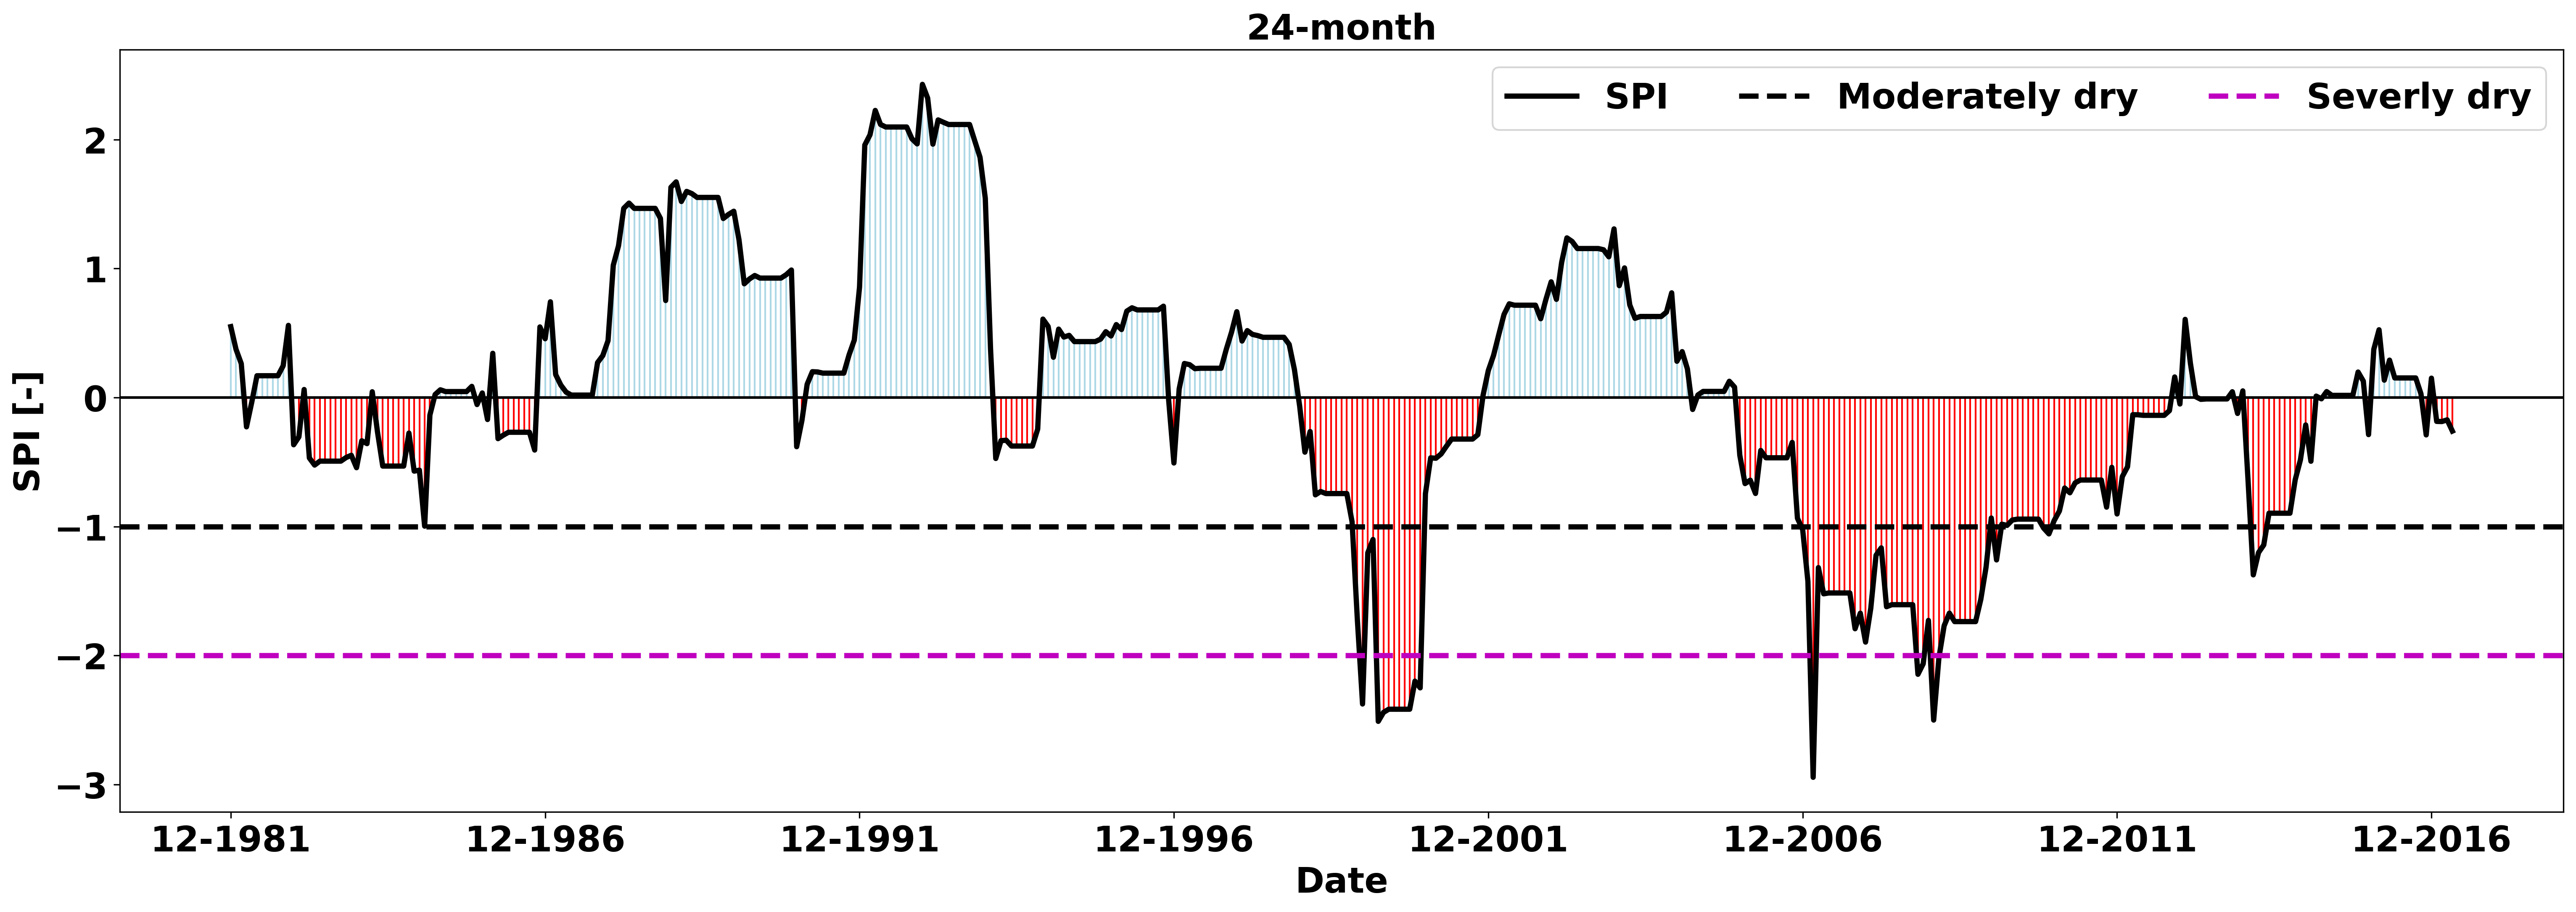

In [ ]:
SPI_Jordan2 = SPI_per_accumulation[4]

plt.figure(figsize=(25,8),dpi=300)
plt.plot(SPI_Jordan2.loc[:,'Date'],SPI_Jordan2.loc[:,'SPI'],'k',markersize=14,linewidth=3,label='SPI')

plt.rcParams.update({'font.size': 20})
plt.xticks(fontsize=20,fontweight='bold')
plt.yticks(fontsize=20,fontweight='bold')
plt.ylabel('SPI [-]',fontsize=20,fontweight='bold')
plt.xlabel('Date',fontsize=20,fontweight='bold')
plt.axhline(y=0,color='k')
plt.axhline(y=-1,color='k',linestyle='dashed',linewidth=3,label='Moderately dry')
plt.axhline(y=-2,color='m',linestyle='dashed',linewidth=3,label='Severly dry')


for k in range(0,len(SPI_Jordan2.loc[:,'SPI'])):
    if   SPI_Jordan2.loc[k,'SPI']>0:
        c='lightblue'
    else:
        c='red'

    plt.fill_between([SPI_Jordan2.loc[k,'Date'],SPI_Jordan2.loc[k,'Date']],[SPI_Jordan2.loc[k,'SPI'], SPI_Jordan2.loc[k,'SPI']],color=c)


legend_properties = {'weight':'bold','size': 20}
plt.legend(prop=legend_properties,loc='best',ncol=3)

plt.gca().xaxis.set_major_locator(plt.MultipleLocator(60))

plt.title('%s-month'%24,fontsize=20,fontweight='bold')


### References
1. McKee, T.B., Doesken, N.J., Kleist, J., 1993. The relationship of drought frequency and duration to time scales, in: Proceedings of the 8th Conference on Applied Climatology. Boston, pp. 179–183.

2. Vicente-Serrano, S.M., Beguería, S., López-Moreno, J.I., 2010. A multiscalar drought index sensitive to global warming: the standardized precipitation evapotranspiration index. Journal of climate 23, 1696–1718.

3. Stagge, J.H., Tallaksen, L.M., Gudmundsson, L., Van Loon, A.F., Stahl, K., 2015b. Candidate distributions for climatological drought indices (SPI and SPEI). Int. J. Climatol. 35, 4027–4040.

### For more information check our website: <a href = "https://emwre.eu/" >eMWRE</a> and <a href="https://www.openwater.network/"> Open Water Network </a>

### Also follow our <a href = "https://www.youtube.com/channel/UCaoGoyc4TalqNdPzyQB9Sng/videos">YouTube Channel </a>